# Supervised Learning: Text preprocessing

In [46]:
### load packages 
import numpy as np 
import pandas as pd
from autocorrect import spell 
import matplotlib
from nltk.stem import WordNetLemmatizer 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import re
import string
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stopwords.words('english')
import warnings
from nltk import word_tokenize, corpus
warnings.simplefilter("ignore")
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style
from nltk.tokenize import word_tokenize

In [47]:
### load data and merge them  
df=pd.read_csv("title_sentiment.csv")

# change column name 
df.rename({'clean_title': 'clean_text'}, axis=1, inplace=True)
#look at ddta
print(df.info()) 
sents_count=pd.DataFrame(df.groupby("Sentiment")["Sentiment"].count()).rename(columns={"Sentiment":"Entries"}).reset_index().style.set_caption("Sentiment overview")
sents_count

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38641 entries, 0 to 38640
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentiment   38641 non-null  object
 1   score       38641 non-null  int64 
 2   comms_num   38641 non-null  int64 
 3   timestamp   38641 non-null  object
 4   clean_text  38510 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.5+ MB
None


,Sentiment,score,comms_num,timestamp,clean_text
0,Neutral,55,6,2021-01-28 21:37:41,it not about the money it about sending message
1,Negative,110,23,2021-01-28 21:32:10,math professor scott steiner says the numbers ...
2,Neutral,0,47,2021-01-28 21:30:35,exit the system
3,Negative,29,74,2021-01-28 21:28:57,new sec filing for gme can someone less retard...
4,Positive,71,156,2021-01-28 21:26:56,not to distract from gme just thought our amc ...
...,...,...,...,...,...
38636,Positive,19,5,2021-03-04 01:27:07,nclh yolo update
38637,Positive,59,76,2021-03-04 01:19:25,adding to rkt 300 more to 1000 on morning pull...
38638,Positive,44,26,2021-03-04 01:19:01,started at 5k few weeks ago now it time for th...
38639,Positive,864,22,2021-03-04 01:17:22,posted yesterday about buying gme 104 122 94 f...


In [48]:
# dropping the columns we dont need
df.drop(columns=['score', 'comms_num', 'timestamp'], inplace=True)
df
print (list(df))
df['clean_text']=df['clean_text'].apply(str)


['Sentiment', 'clean_text']


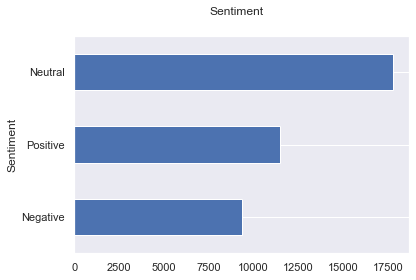

In [49]:
fig, ax = plt.subplots()
fig.suptitle("Sentiment", fontsize=12)
df["Sentiment"].reset_index().groupby("Sentiment").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [50]:
def make_tokens(row):
    posts = row['clean_text']
    tokens = nltk.word_tokenize(posts)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['words'] = df.apply(make_tokens, axis=1)

#dropping the rows where the string is empty 
df=df[df['words'].map(lambda d: len(d)) > 0]


In [51]:
### Lemmatize

lemmatizer = WordNetLemmatizer() 

def Lemmatizer(row):
    my_list = row['words']
    lemma_list = [lemmatizer.lemmatize(word) for word in my_list]
    return (lemma_list)

df['lemmatized_words'] = df.apply(Lemmatizer, axis=1)



In [52]:
### removing stopwords 

stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['lemmatized_words']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

df['lemma_meaningful'] = df.apply(remove_stops, axis=1)


In [53]:
### make back into string 

def make_string(row):
    my_list = row['lemma_meaningful']
    joined_words = ( " ".join(my_list))
    return joined_words

df['processed'] = df.apply(make_string, axis=1)

In [54]:
#drop irrelavant columns 
df.drop(columns=['clean_text', 'words', 'lemmatized_words'], inplace=True)


In [95]:
df=df.sort_values(by="Sentiment")

df=df.sort_values(by="Sentiment")

df= df.reset_index(drop=True)
df=df.drop(df_sort.index[17000:24000])


In [96]:
df

,Sentiment,lemma_meaningful,processed
0,Negative,"[app, use, rh, dead]",app use rh dead
1,Negative,[fud],fud
2,Negative,"[amc, amc, amc, low, let, trade]",amc amc amc low let trade
3,Negative,"[serious, question, short, ladder, attack]",serious question short ladder attack
4,Negative,"[til, fucking, fuck, billionaire, fucker]",til fucking fuck billionaire fucker
...,...,...,...
38614,Positive,"[robinhood, let, buy, gme, amc, fine, opened, ...",robinhood let buy gme amc fine opened fidelity...
38615,Positive,"[help, get, tendies, deepfucking, value, part]",help get tendies deepfucking value part
38616,Positive,"[dont, sell, look, buy, dont, let, short, win,...",dont sell look buy dont let short win easy
38617,Positive,"[best, yet, come, got, others, back, let, gme,...",best yet come got others back let gme amc


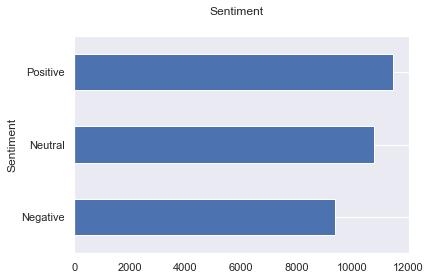

In [97]:
fig, ax = plt.subplots()
fig.suptitle("Sentiment", fontsize=12)
df["Sentiment"].reset_index().groupby("Sentiment").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [98]:
## Create csv 

# create csv file 
df.to_csv('processed_sentiment_data.csv',index=False )